In [2]:
# imports
import pandas as pd
import random as rd

# get data
df = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv', header=0, usecols=['NObeyesdad'])
print(df.head())

            NObeyesdad
0        Normal_Weight
1        Normal_Weight
2        Normal_Weight
3   Overweight_Level_I
4  Overweight_Level_II


In [3]:
# create empty arrays for the values in the dataset
insufficient_weight = []
normal_weight = []
overweight_level_1 = []
overweight_level_2 = []
obesity_type_1 = []
obesity_type_2 = []
obesity_type_3 = []

# separate the values in the dataset
for row in df.iterrows():
    # print(row[1]['NObeyesdad'])
    if row[1]['NObeyesdad'] == 'Insufficient_Weight':
        insufficient_weight.append(row[0])
    elif row[1]['NObeyesdad'] == 'Normal_Weight':
        normal_weight.append(row[0])
    elif row[1]['NObeyesdad'] == 'Overweight_Level_I':
        overweight_level_1.append(row[0])
    elif row[1]['NObeyesdad'] == 'Overweight_Level_II':
        overweight_level_2.append(row[0])
    elif row[1]['NObeyesdad'] == 'Obesity_Type_I':
        obesity_type_1.append(row[0])
    elif row[1]['NObeyesdad'] == 'Obesity_Type_II':
        obesity_type_2.append(row[0])
    elif row[1]['NObeyesdad'] == 'Obesity_Type_III':
        obesity_type_3.append(row[0])

# print the number of values in each array
print('Insufficient weight:', len(insufficient_weight))
print('Normal weight:', len(normal_weight))
print('Overweight level 1:', len(overweight_level_1))
print('Overweight level 2:', len(overweight_level_2))
print('Obesity type 1:', len(obesity_type_1))
print('Obesity type 2:', len(obesity_type_2))
print('Obesity type 3:', len(obesity_type_3))

Insufficient weight: 272
Normal weight: 287
Overweight level 1: 290
Overweight level 2: 290
Obesity type 1: 351
Obesity type 2: 297
Obesity type 3: 324


In [16]:
# create list for bipartite graph
connections = []

# create connections between the values in the dataset
for row in df.iterrows():
    # create 5 random numbers with decreasing values
    rd_1 = rd.randint(0, 5)
    rd_2 = rd.randint(0, 4)
    rd_3 = rd.randint(0, 3)
    rd_4 = rd.randint(0, 2)
    rd_5 = rd.randint(0, 1)
    rd_6 = rd.randint(0, 1)
    rd_7 = rd.randint(0, 1)

    add_connection = rd.randint(0, 50)

    if add_connection == 0:
        if row[1]['NObeyesdad'] == 'Insufficient_Weight':
            for val in range(0, rd_1):
                connections.append([row[0], rd.choice(insufficient_weight)])
            for val in range(0, rd_2):
                connections.append([row[0], rd.choice(normal_weight)])
            for val in range(0, rd_3):
                connections.append([row[0], rd.choice(overweight_level_1)])
            for val in range(0, rd_4):
                connections.append([row[0], rd.choice(overweight_level_2)])
            for val in range(0, rd_5):
                connections.append([row[0], rd.choice(obesity_type_1)])
            for val in range(0, rd_6):
                connections.append([row[0], rd.choice(obesity_type_2)])
            for val in range(0, rd_7):
                connections.append([row[0], rd.choice(obesity_type_3)])
        elif row[1]['NObeyesdad'] == 'Normal_Weight':
            for val in range(0, rd_1):
                connections.append([row[0], rd.choice(normal_weight)])
            for val in range(0, rd_2):
                connections.append([row[0], rd.choice(insufficient_weight)])
            for val in range(0, rd_3):
                connections.append([row[0], rd.choice(overweight_level_2)])
            for val in range(0, rd_4):
                connections.append([row[0], rd.choice(obesity_type_1)])
            for val in range(0, rd_5):
                connections.append([row[0], rd.choice(obesity_type_2)])
            for val in range(0, rd_6):
                connections.append([row[0], rd.choice(obesity_type_3)])
            for val in range(0, rd_7):
                connections.append([row[0], rd.choice(overweight_level_1)])
        elif row[1]['NObeyesdad'] == 'Overweight_Level_I':
            for val in range(0, rd_1):
                connections.append([row[0], rd.choice(overweight_level_1)])
            for val in range(0, rd_2):
                connections.append([row[0], rd.choice(normal_weight)])
            for val in range(0, rd_3):
                connections.append([row[0], rd.choice(insufficient_weight)])
            for val in range(0, rd_4):
                connections.append([row[0], rd.choice(obesity_type_1)])
            for val in range(0, rd_5):
                connections.append([row[0], rd.choice(obesity_type_2)])
            for val in range(0, rd_6):
                connections.append([row[0], rd.choice(obesity_type_3)])
            for val in range(0, rd_7):
                connections.append([row[0], rd.choice(overweight_level_2)])
        elif row[1]['NObeyesdad'] == 'Overweight_Level_II':
            for val in range(0, rd_1):
                connections.append([row[0], rd.choice(overweight_level_2)])
            for val in range(0, rd_2):
                connections.append([row[0], rd.choice(obesity_type_1)])
            for val in range(0, rd_3):
                connections.append([row[0], rd.choice(normal_weight)])
            for val in range(0, rd_4):
                connections.append([row[0], rd.choice(insufficient_weight)])
            for val in range(0, rd_5):
                connections.append([row[0], rd.choice(obesity_type_2)])
            for val in range(0, rd_6):
                connections.append([row[0], rd.choice(obesity_type_3)])
            for val in range(0, rd_7):
                connections.append([row[0], rd.choice(overweight_level_1)])
        elif row[1]['NObeyesdad'] == 'Obesity_Type_I':
            for val in range(0, rd_1):
                connections.append([row[0], rd.choice(obesity_type_1)])
            for val in range(0, rd_2):
                connections.append([row[0], rd.choice(overweight_level_1)])
            for val in range(0, rd_3):
                connections.append([row[0], rd.choice(normal_weight)])
            for val in range(0, rd_4):
                connections.append([row[0], rd.choice(insufficient_weight)])
            for val in range(0, rd_5):
                connections.append([row[0], rd.choice(obesity_type_2)])
            for val in range(0, rd_6):
                connections.append([row[0], rd.choice(obesity_type_3)])
            for val in range(0, rd_7):
                connections.append([row[0], rd.choice(overweight_level_2)])
        elif row[1]['NObeyesdad'] == 'Obesity_Type_II':
            for val in range(0, rd_1):
                connections.append([row[0], rd.choice(obesity_type_2)])
            for val in range(0, rd_2):
                connections.append([row[0], rd.choice(overweight_level_2)])
            for val in range(0, rd_3):
                connections.append([row[0], rd.choice(obesity_type_1)])
            for val in range(0, rd_4):
                connections.append([row[0], rd.choice(normal_weight)])
            for val in range(0, rd_5):
                connections.append([row[0], rd.choice(insufficient_weight)])
            for val in range(0, rd_6):
                connections.append([row[0], rd.choice(obesity_type_3)])
            for val in range(0, rd_7):
                connections.append([row[0], rd.choice(overweight_level_1)])
        elif row[1]['NObeyesdad'] == 'Obesity_Type_III':
            for val in range(0, rd_1):
                connections.append([row[0], rd.choice(obesity_type_3)])
            for val in range(0, rd_2):
                connections.append([row[0], rd.choice(overweight_level_1)])
            for val in range(0, rd_3):
                connections.append([row[0], rd.choice(obesity_type_1)])
            for val in range(0, rd_4):
                connections.append([row[0], rd.choice(normal_weight)])
            for val in range(0, rd_5):
                connections.append([row[0], rd.choice(insufficient_weight)])
            for val in range(0, rd_6):
                connections.append([row[0], rd.choice(obesity_type_2)])
            for val in range(0, rd_7):
                connections.append([row[0], rd.choice(overweight_level_2)])


In [41]:
labelDict = {}

for i in range(0, len(connections)):
    labelDict[connections[i][0]] = df['NObeyesdad'][connections[i][0]]

labelDict

{144: 'Overweight_Level_I',
 233: 'Overweight_Level_II',
 249: 'Overweight_Level_I',
 323: 'Normal_Weight',
 378: 'Normal_Weight',
 420: 'Insufficient_Weight',
 433: 'Normal_Weight',
 434: 'Normal_Weight',
 525: 'Insufficient_Weight',
 618: 'Insufficient_Weight',
 624: 'Insufficient_Weight',
 630: 'Insufficient_Weight',
 632: 'Insufficient_Weight',
 731: 'Insufficient_Weight',
 779: 'Overweight_Level_I',
 798: 'Overweight_Level_I',
 844: 'Overweight_Level_I',
 845: 'Overweight_Level_I',
 954: 'Overweight_Level_I',
 1013: 'Overweight_Level_II',
 1067: 'Overweight_Level_II',
 1116: 'Overweight_Level_II',
 1159: 'Overweight_Level_II',
 1213: 'Obesity_Type_I',
 1217: 'Obesity_Type_I',
 1272: 'Obesity_Type_I',
 1298: 'Obesity_Type_I',
 1300: 'Obesity_Type_I',
 1345: 'Obesity_Type_I',
 1357: 'Obesity_Type_I',
 1406: 'Obesity_Type_I',
 1518: 'Obesity_Type_II',
 1577: 'Obesity_Type_II',
 1584: 'Obesity_Type_II',
 1678: 'Obesity_Type_II',
 1741: 'Obesity_Type_II',
 1787: 'Obesity_Type_II',
 179

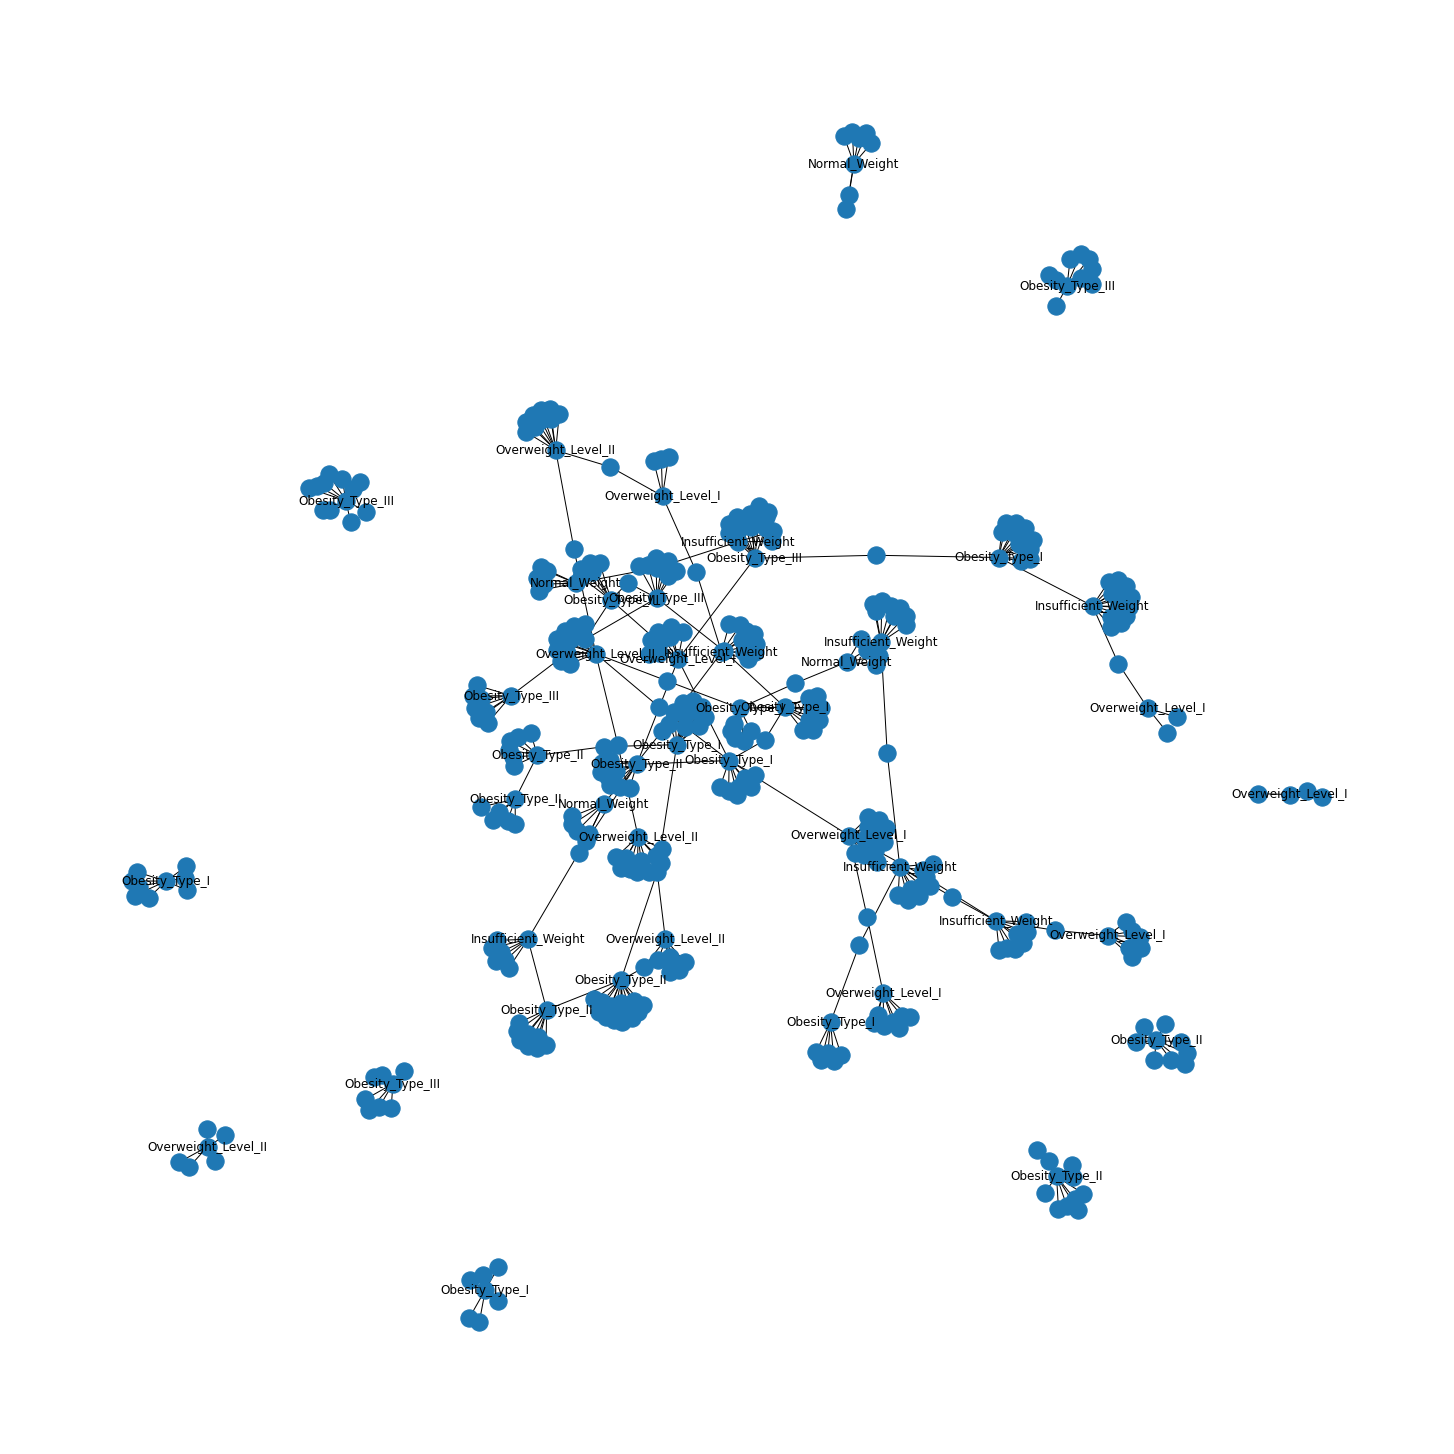

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# create graph from connections
G = nx.Graph()
G.add_edges_from(connections)

plt.figure(figsize=(20,20))

# draw graph
nx.draw(G, labels=labelDict, with_labels=True)